## 1. Loading Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("seoulbike.csv", encoding='CP949')
df

Date  Rented Bike Count  Hour  Temperature(캜)  Humidity(%)  \
0     01/12/2017                254     0            -5.2           37   
1     01/12/2017                204     1            -5.5           38   
2     01/12/2017                173     2            -6.0           39   
3     01/12/2017                107     3            -6.2           40   
4     01/12/2017                 78     4            -6.0           36   
...          ...                ...   ...             ...          ...   
8755  30/11/2018               1003    19             4.2           34   
8756  30/11/2018                764    20             3.4           37   
8757  30/11/2018                694    21             2.6           39   
8758  30/11/2018                712    22             2.1           41   
8759  30/11/2018                584    23             1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(캜)  \
0                  2.2              2000                     -17.6   
1                  0.8              2000                     -17.6   
2                  1.0              2000                     -17.7   
3                  0.9              2000                     -17.6   
4                  2.3              2000                     -18.6   
...                ...               ...                       ...   
8755               2.6              1894                     -10.3   
8756               2.3              2000                      -9.9   
8757               0.3              1968                      -9.9   
8758               1.0              1859                      -9.8   
8759               1.3              1909                      -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(캜)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(캜)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

## 2. Data Observation

### 2.1 컬럼명 변경

In [4]:
df=df.rename(columns = {'Temperature(캜)':'Temperature(celsius)',
                        'Dew point temperature(캜)':'Dew point temperature(celsius)'})

### 2.2 파생변수 생성

자전거 대여 날짜를 분석에 이용하기 위해, year, month, day의 파생변수를 생성하고, Date변수는 제거하였다.

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
for df in [df]:
 df['year'] = df['Date'].dt.year
 df['month'] = df['Date'].dt.month
 df['day'] = df['Date'].dt.day

C:\Users\gksxk\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\gksxk\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\gksxk\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\gksxk\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/12/2017' in DD/MM/YYYY format. Provide format or specif

In [6]:
df=df.drop(columns='Date')

### 2.3 변수별 기술통계량

In [7]:
df.describe()

Rented Bike Count         Hour  Temperature(celsius)  Humidity(%)  \
count        8760.000000  8760.000000           8760.000000  8760.000000   
mean          704.602055    11.500000             12.882922    58.226256   
std           644.997468     6.922582             11.944825    20.362413   
min             0.000000     0.000000            -17.800000     0.000000   
25%           191.000000     5.750000              3.500000    42.000000   
50%           504.500000    11.500000             13.700000    57.000000   
75%          1065.250000    17.250000             22.500000    74.000000   
max          3556.000000    23.000000             39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(celsius)  \
count       8760.000000       8760.000000                     8760.000000   
mean           1.724909       1436.825799                        4.073813   
std            1.036300        608.298712                       13.060369   
min            0.000000         27.000000                      -30.600000   
25%            0.900000        940.000000                       -4.700000   
50%            1.500000       1698.000000                        5.100000   
75%            2.300000       2000.000000                       14.800000   
max            7.400000       2000.000000                       27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)         year  \
count              8760.000000   8760.000000    8760.000000  8760.000000   
mean                  0.569111      0.148687       0.075068  2017.915068   
std                   0.868746      1.128193       0.436746     0.278796   
min                   0.000000      0.000000       0.000000  2017.000000   
25%                   0.000000      0.000000       0.000000  2018.000000   
50%                   0.010000      0.000000       0.000000  2018.000000   
75%                   0.930000      0.000000       0.000000  2018.000000   
max                   3.520000     35.000000       8.800000  2018.000000   

             month          day  
count  8760.000000  8760.000000  
mean      6.526027    15.720548  
std       3.448048     8.796749  
min       1.000000     1.000000  
25%       4.000000     8.000000  
50%       7.000000    16.000000  
75%      10.000000    23.000000  
max      12.000000    31.000000

### 2.4 이상치 확인

#### 2.4.1 Hour, Temperature(celsius), Humidity(%), Dew point temperature(celsius)

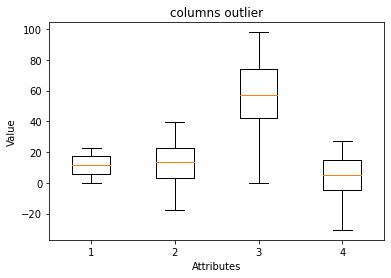

In [8]:
data_to_boxplot = [df['Hour'],
                   df['Temperature(celsius)'],
                   df['Humidity(%)'],
                   df['Dew point temperature(celsius)']
                  ]
plt.boxplot(data_to_boxplot)
plt.title('columns outlier')
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

#### 2.4.2 Solar Radiation, Rainfall(mm), Snowfall (cm),Wind speed (m/s)

Solar Radiation, Rainfall(mm), Snowfall (cm),Wind speed (m/s)의 변수에서 이상치가 발견되었지만, 우리나라의 경우 사계절이 뚜렷하여, 기후와 관련된 변수들의 값 범위가 다양할 수 있어 제거하지 않았다.

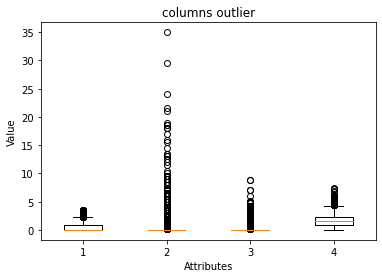

In [9]:
data_to_boxplot = [df['Solar Radiation (MJ/m2)'],
                   df['Rainfall(mm)'],
                   df['Snowfall (cm)'],
                   df['Wind speed (m/s)']
                  ]
plt.boxplot(data_to_boxplot)
plt.title('columns outlier')
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()


In [10]:
df=df.drop(index=df[df['Rainfall(mm)']>25].index)

### 2.5 category 변수 확인 및 encoding

In [11]:
print(df['Seasons'].unique())
print(df['Holiday'].unique())
print(df['Functioning Day'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']


category 변수들의 범주를 독립적인 변수로 표현하여 영향을 알아보기 위해, one-hot encoding을 통해, 수치형으로 바꿔주었다.

In [12]:
df=pd.get_dummies(df, columns = ['Seasons',
                              'Holiday',
                              'Functioning Day'], drop_first=True)

## 3. Exploratory Data Analysis

target인 Rented Bike Count 변수와 Temperature(celsius), Hour, Dew point temperature(celsius) 변수가 상관성이 높은 것으로 보이며, 그 중 Temperature(celsius)와 Dew point temperature(celsius) 변수는 다중공선성을 갖는 것으로 보인다.  
따라서 다중공선성에 민감한 회귀모형(LR)에서는 두 변수 중 하나를 제거하는 것이 적절할 것으로 생각된다.

<AxesSubplot:>

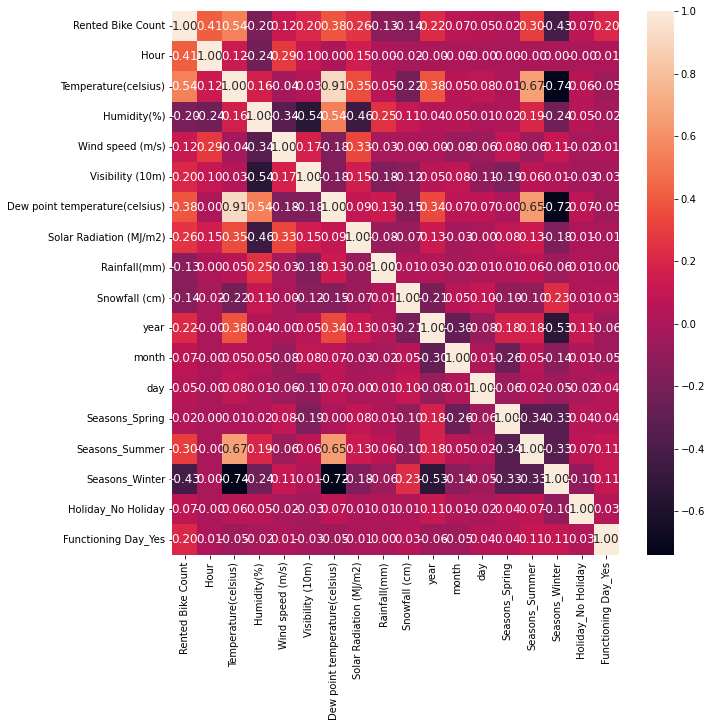

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', annot_kws={"size": 12})

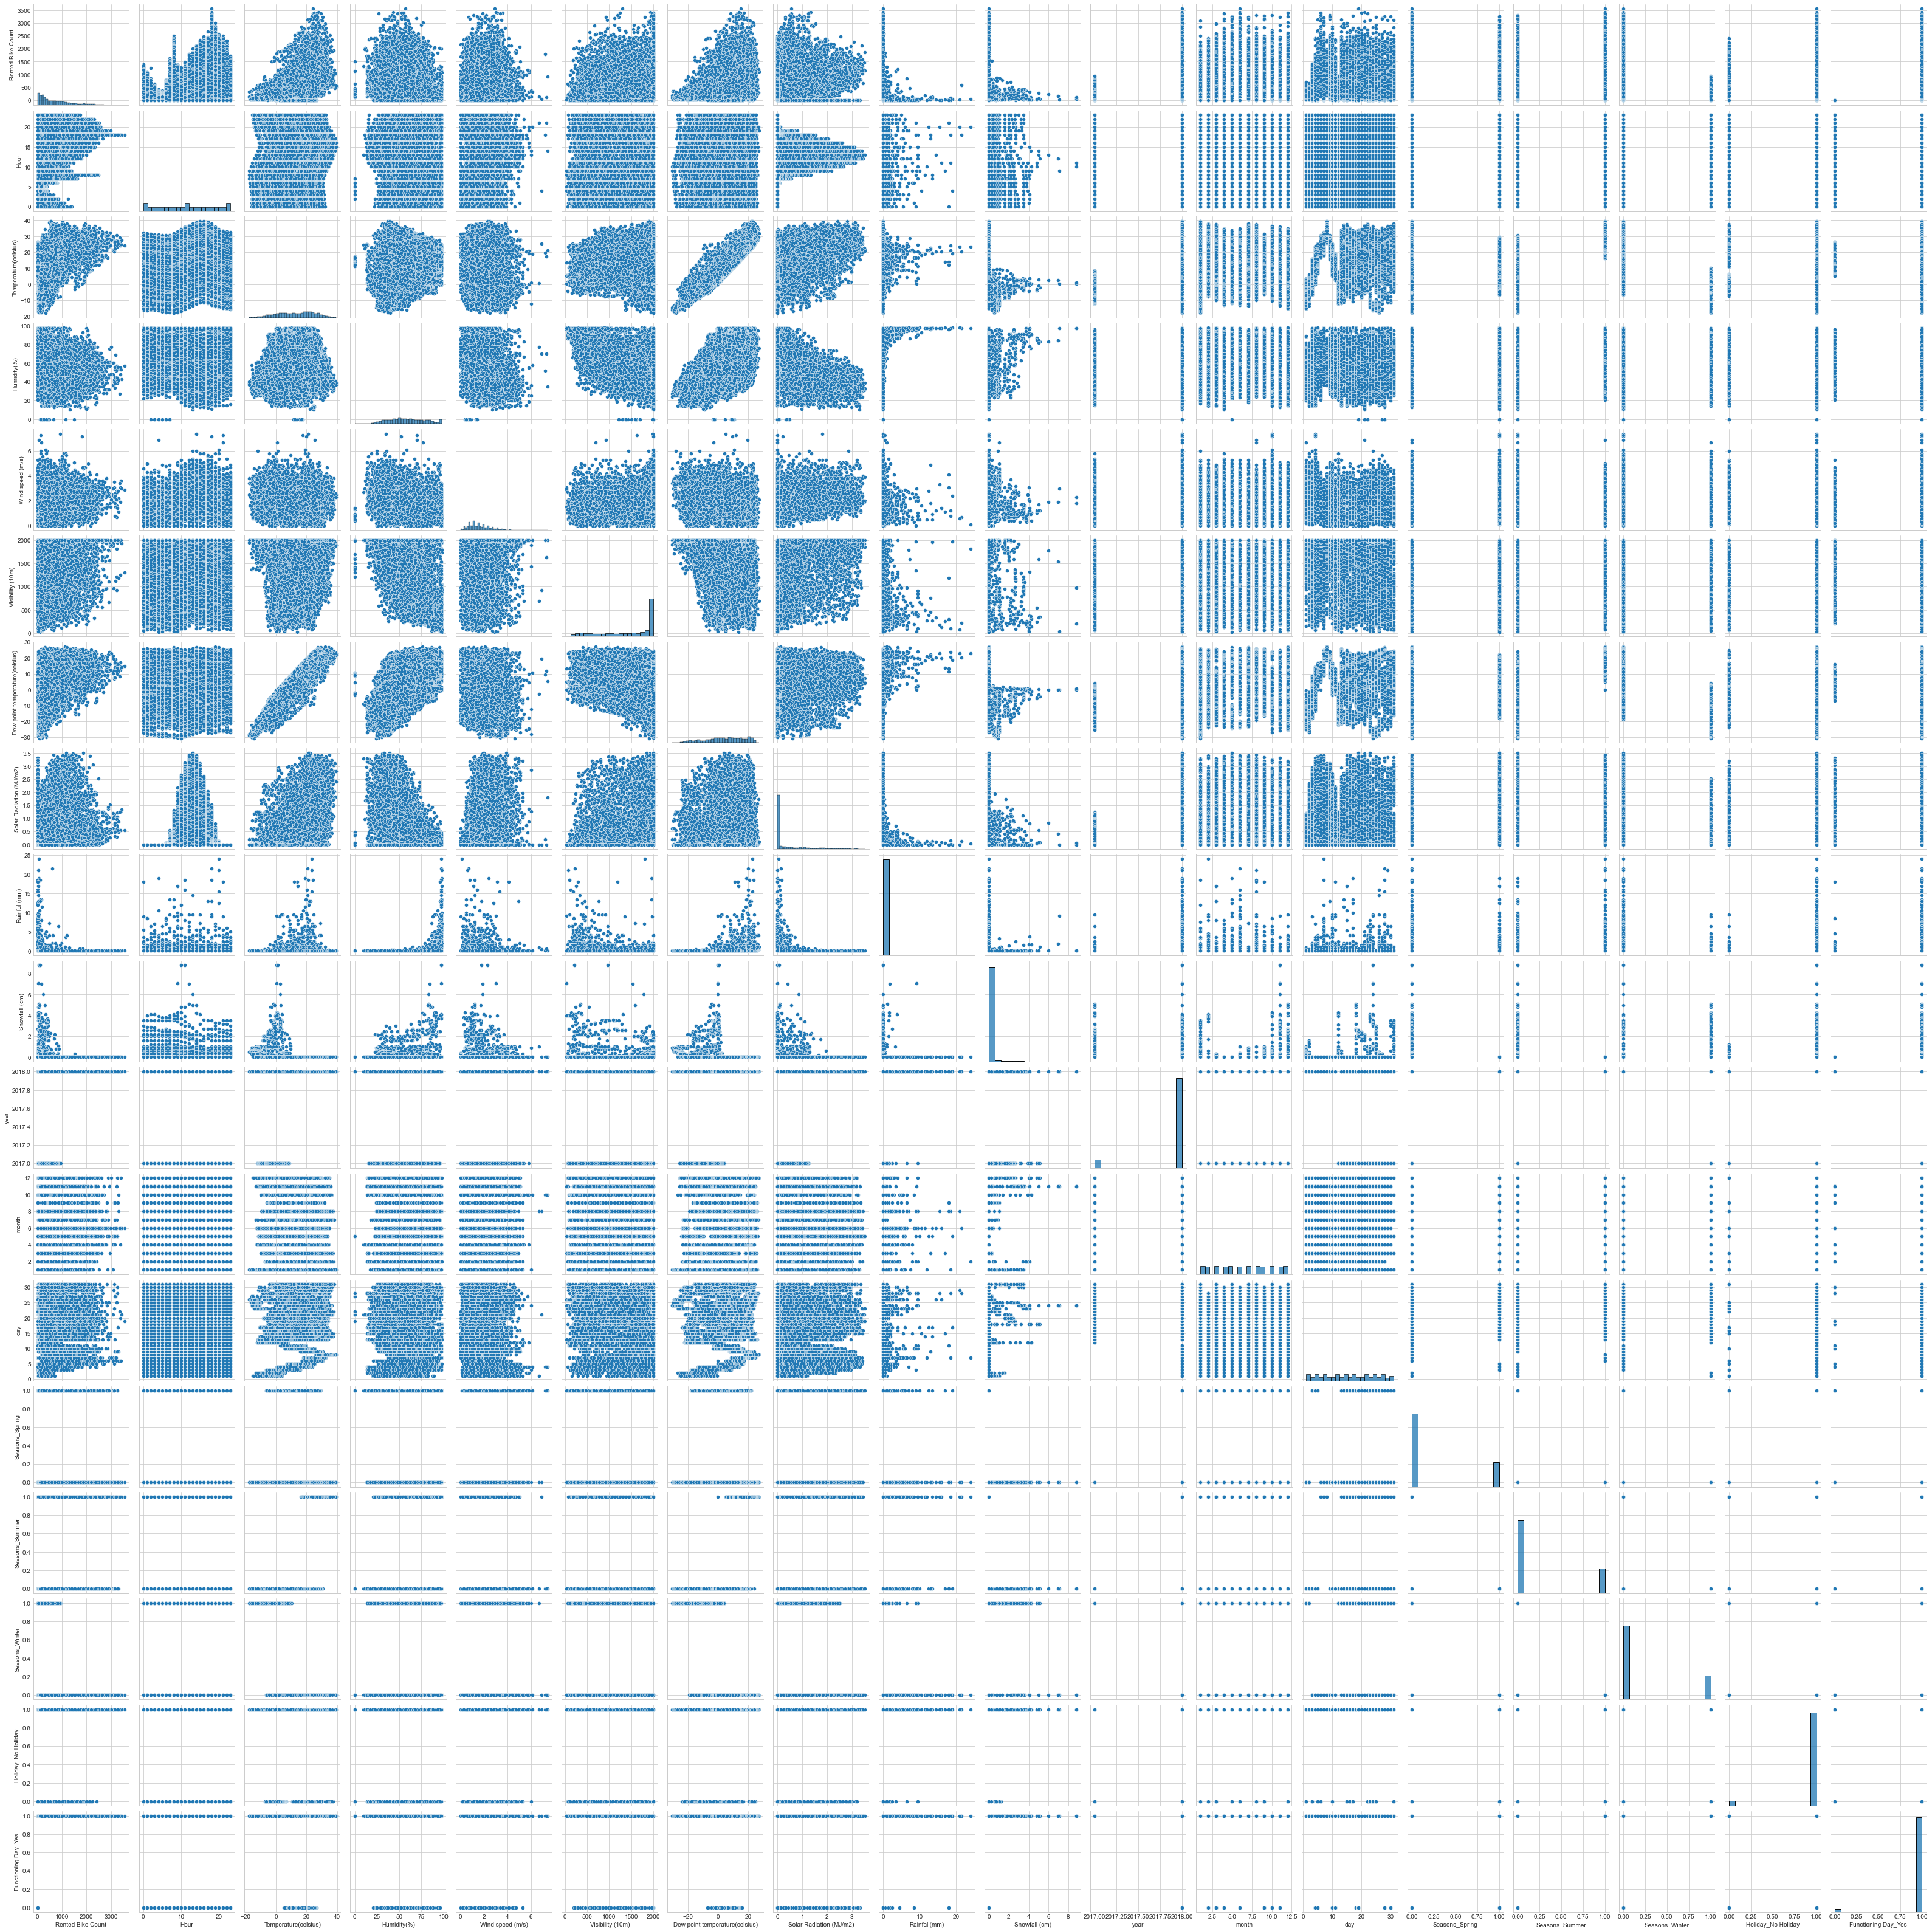

In [14]:
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)

sns.pairplot(df)
plt.savefig('pairplor.png')

### 3.1 Rented Bike Count vs Temperature(celsius)

target인 Rented Bike Count와 상관계수가 가장 높은 Temperature(celsius) 변수의 scatterplot으로, 양의 상관관계를 보인다.

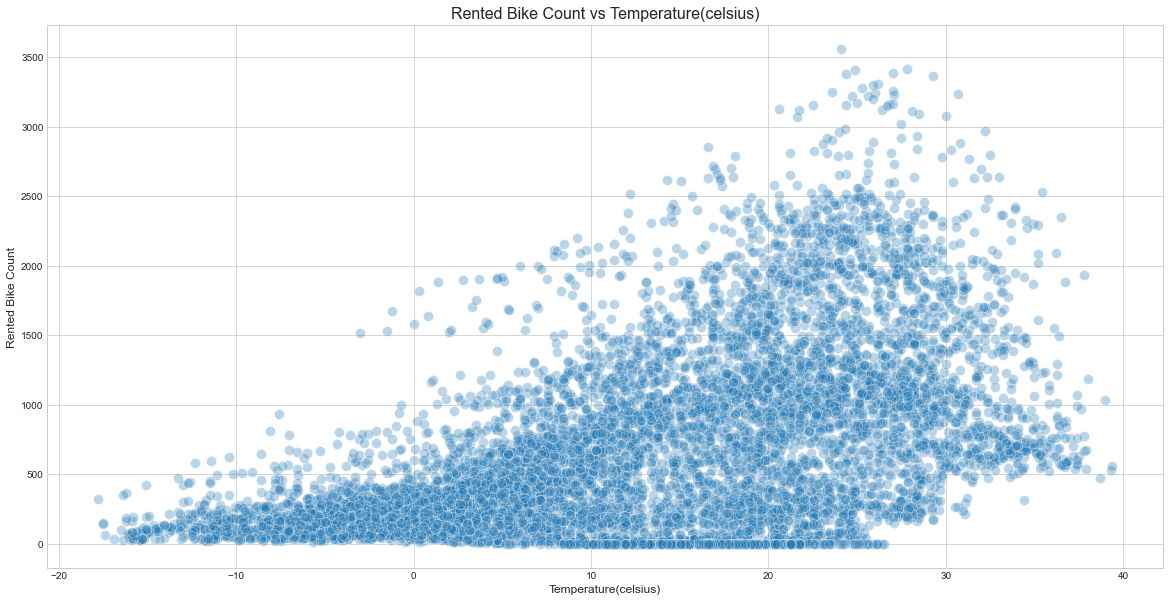

In [15]:
plt.scatter(x = 'Temperature(celsius)', y = 'Rented Bike Count', 
            data = df, s = 100, alpha = 0.3, edgecolor = 'white')

plt.title('Rented Bike Count vs Temperature(celsius)', fontsize = 16)
plt.ylabel('Rented Bike Count', fontsize = 12)
plt.xlabel('Temperature(celsius)', fontsize = 12)
plt.show()

## 4. Splitting into training and testing datsets

단순 선형 회귀 분석의 독립변수는 target과 상관계수가 0.54로 가장 큰 Temperature(celsius)로 사용했다. 또한 training, test 데이터셋을 7:3 비율로 분할했다.

In [16]:
X_var = df[['Temperature(celsius)']] 
y_var = df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 0)

## 5. Training model(SLR)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
slr_yhat = lr.predict(X_test)

## 6. Checking accuracy(SLR)

Temperature(celsius)를 독립변수로 하는 SLR의 결과, R2 score는 약 0.28로 나타났고, RMSE는 약 542.3으로 나타났다.  
낮은 R2 score를 통해, Temperature(celsius)를 독립변수로 하는 SLR이 Target을 잘 설명하지 못한다는 것을 알 수 있다.

In [18]:
print("R2 : ", r2_score(y_test, slr_yhat))
print("RMSE : ", mean_squared_error(y_test, slr_yhat, squared=False))

R2 :  0.28369336149381674
RMSE :  542.2977779721097


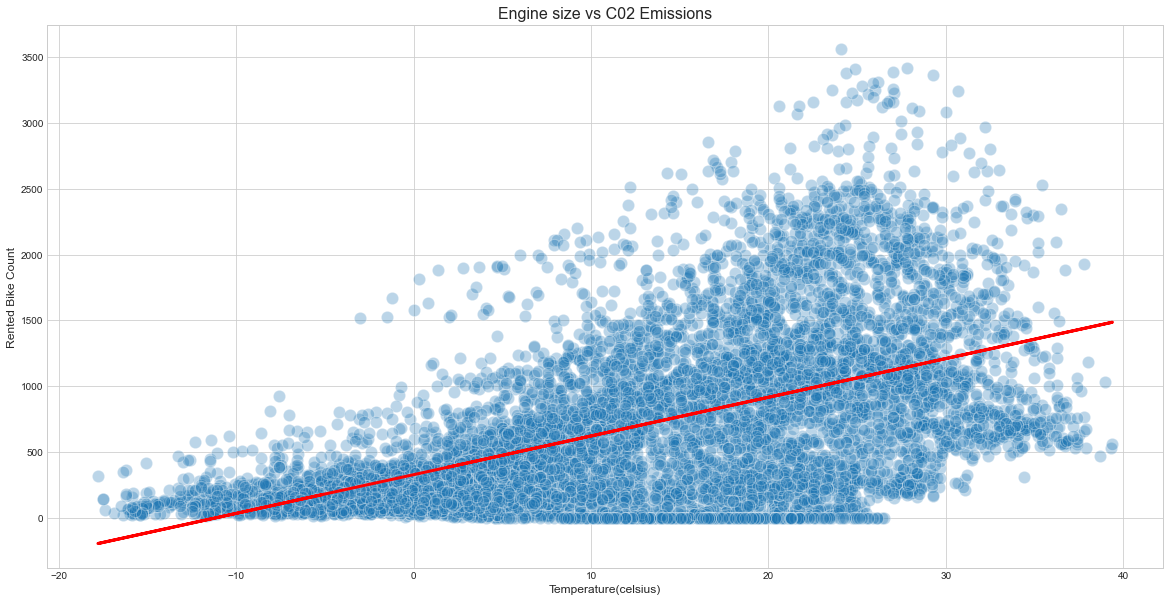

In [19]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_

sns.scatterplot(x = 'Temperature(celsius)', y = 'Rented Bike Count', 
               data = df, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(df['Temperature(celsius)'], slr_slope*df['Temperature(celsius)'] + slr_intercept, 
         color = 'r', linewidth = 3)
plt.title('Engine size vs C02 Emissions', fontsize = 16)
plt.ylabel('Rented Bike Count', fontsize = 12)
plt.xlabel('Temperature(celsius)', fontsize = 12)
plt.show()

## + improving accuracy

## 4. Splitting into training and testing datsets

다음은 다중회귀모형(MLR), AdaBoost, Random Forest에 사용할 데이터 셋을 분할하는 과정이다.  
독립변수는 Target 그리고 Temperature(celsius)와 다중공선성을 갖는 것으로 생각되는 Dew point temperature(celsius)를 제외한 모든 변수로 선정하였다.

In [21]:
X1_var = df.drop(columns=['Rented Bike Count', 'Dew point temperature(celsius)'
                         ])
y_var = df['Rented Bike Count'] 
X_train, X_test, y_train, y_test = train_test_split(X1_var,
                                                    y_var,
                                                    test_size = 0.3,
                                                    random_state = 0)

### 4.1 MLR

Dew point temperature(celsius)를 제외한 모든 변수를 독립변수로 하는 MLR의 결과, R2 score는 약 0.54로 나타났고, RMSE는 약 433.03으로 나타났다.  
R2 score를 통해, 기존의 SLR보다 MLR이 Target을 잘 설명함을 알 수 있고, 또한 RMSE도 큰 폭으로 감소했음을 알 수 있다.

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
mlr_yhat = lr.predict(X_test)

In [23]:
print("R2 : ", r2_score(y_test, mlr_yhat))
print("RMSE : ", mean_squared_error(y_test, mlr_yhat, squared=False))

R2 :  0.5432761732398765
RMSE :  433.027194531569


다음의 그래프로 MLR의 예측값(Predicted Values)와 실제값(Actual)을 비교하였다.  
SLR보다 설명력이 향상되었으나 그래프를 통해 확인한 결과, Target인 Rented Bike Count의 전반적인 범위에 대해 예측 성능이 뛰어나지 않는 것으로 확인되었다.

C:\Users\gksxk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\gksxk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


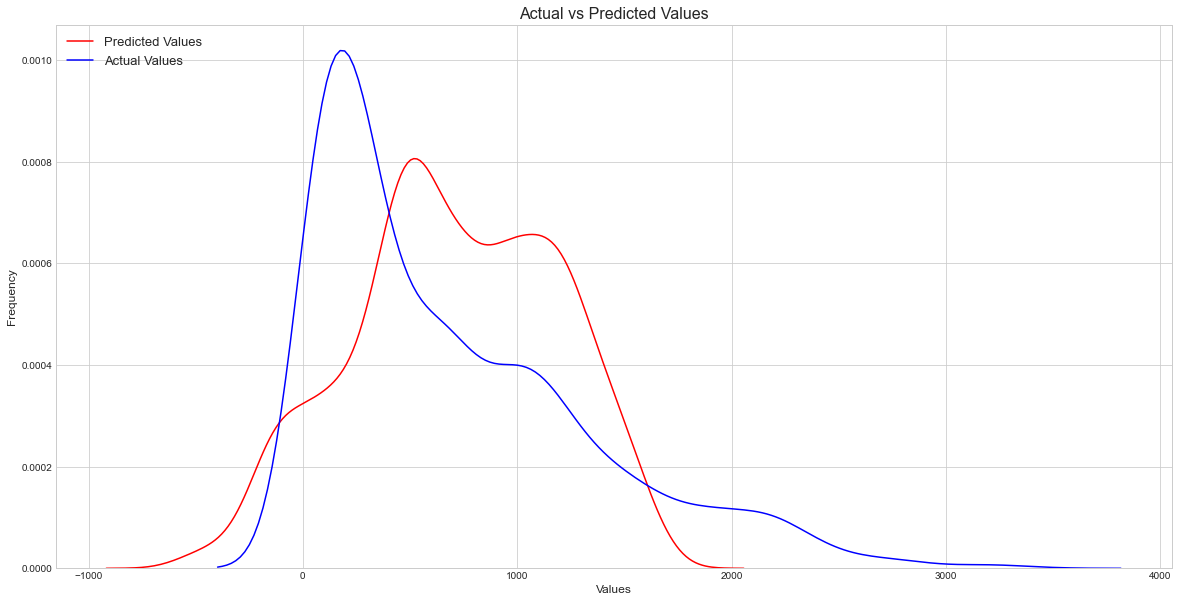

In [33]:
sns.distplot(mlr_yhat, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)
plt.show()

### 4.2 AdaBoost

Dew point temperature(celsius)를 제외한 모든 변수를 독립변수로 하는 AdaBoost의 결과, R2 score는 약 0.67로 나타났고, RMSE는 약 365.48으로 나타났다.
R2 score를 통해, SLR, MLR보다 Target을 잘 설명함을 알 수 있고, 또한 RMSE도 큰 폭으로 감소했음을 알 수 있다.

In [24]:
ada = AdaBoostRegressor(n_estimators = 10)
ada.fit(X_train, y_train)
ada_yhat = ada.predict(X_test)

In [25]:
print("R2 : ", r2_score(y_test, ada_yhat))
print("RMSE : ", mean_squared_error(y_test, ada_yhat, squared=False))

R2 :  0.6746559948626363
RMSE :  365.47673904111997


다음의 그래프로 AdaBoost의 예측값(Predicted Values)와 실제값(Actual)을 비교하였다.  
SLR와 MLR보다 설명력이 향상되었으나 그래프를 통해 확인한 결과, Target인 Rented Bike Count의 전반적인 범위에 대해 대략적인 값의 예측은 가능하나, 정확한 예측 성능을 가진다고 할 수 없는 것으로 생각된다.

C:\Users\gksxk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\gksxk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


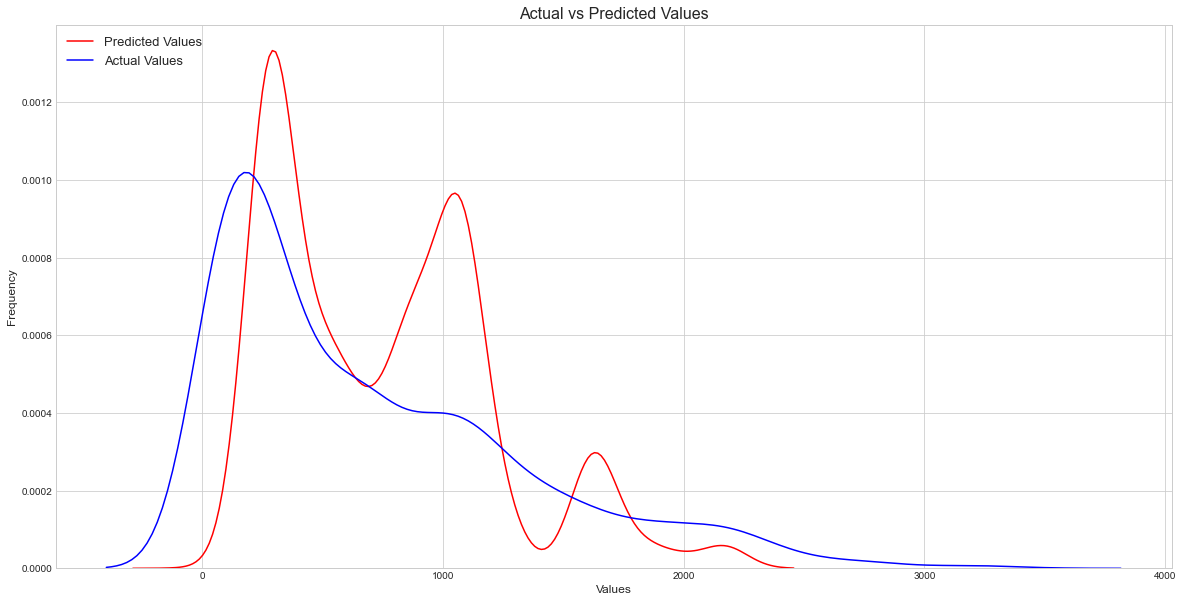

In [34]:
sns.distplot(ada_yhat, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)
plt.show()

### 4.3 Random Forest

Dew point temperature(celsius)를 제외한 모든 변수를 독립변수로 하는 Random Forest의 결과, R2 score는 약 0.87로 나타났고, RMSE는 약 229.94로 나타났다. R2 score를 통해, 기존의 모든 모델보다 Target을 잘 설명함을 알 수 있고, RMSE 또한 가장 작게 나타났음을 알 수 있다.

In [28]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [29]:
print("R2 : ", r2_score(y_test, rf_yhat))
print("RMSE : ", mean_squared_error(y_test, rf_yhat, squared=False))

R2 :  0.8712270696070452
RMSE :  229.9326402754535


다음의 그래프로 Random Forest의 예측값(Predicted Values)와 실제값(Actual)을 비교하였다.
기존의 모델들과 비교하여, 확연히 설명력이 향상되었으며 그래프를 통해 확인한 결과 또한 Target의 전반적인 범위에 대한 정확한 예측을 하고 있음을 알 수 있다. Target의 (550, 2250)에 대한 오차가 존재하는 것을 통해, 이 구간에서 예측 성능이 다른 구간에 비해 다소 떨어진다고 예상할 수 있다.

C:\Users\gksxk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\gksxk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


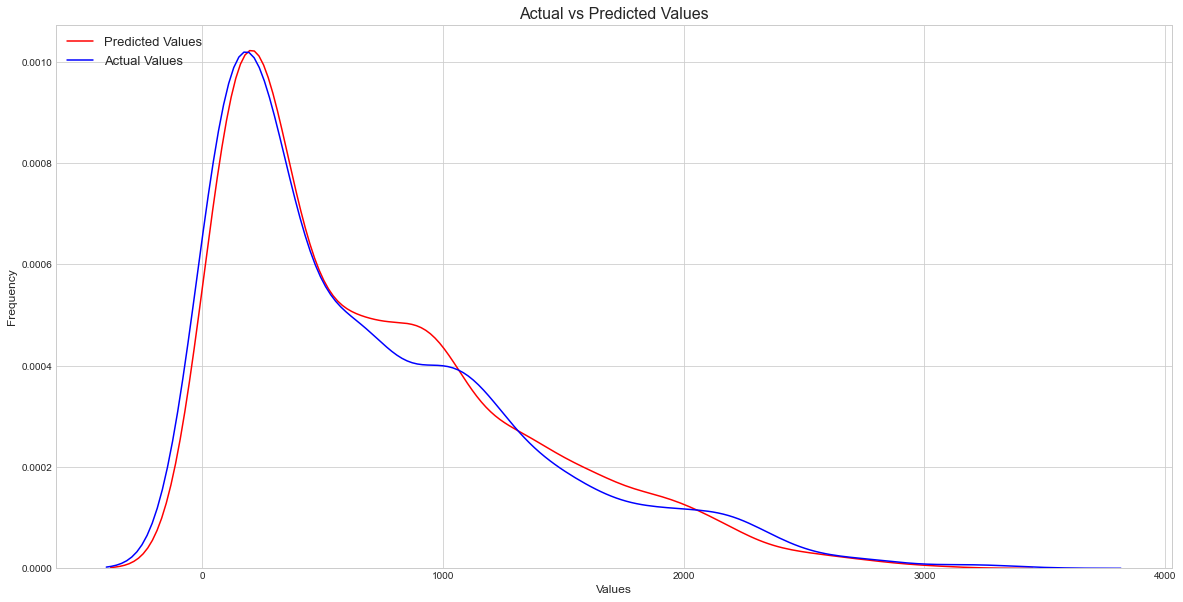

In [35]:
sns.distplot(rf_yhat, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)
plt.show()

### 5. Accuracy 비교

다음은 모든 모델들의 R2 score와 RMSE를 비교한 barplot이다.  
RandomForest의 R2 score가 0.870으로 가장 높았으며, SLR의 R2 score가 0.280으로 가장 낮았다.  
또한 당연하게 RandomForest의 RMSE가 229.930으로 가장 작았고, SLR의 RMSE가 542.300로 가장 컸다.

In [36]:
import seaborn as sns
reg = pd.DataFrame({'regressor':['SLR', 'MLR', 'Ada Boost', 'Random Forest'],
                    'R2':[round(r2_score(y_test, slr_yhat),2),
                          round(r2_score(y_test, mlr_yhat),2),
                          round(r2_score(y_test, ada_yhat),2),
                          round(r2_score(y_test, rf_yhat),2)],
                    'RMSE':[round(mean_squared_error(y_test, slr_yhat, squared=False),2),
                            round(mean_squared_error(y_test, mlr_yhat, squared=False),2),
                            round(mean_squared_error(y_test, ada_yhat, squared=False),2), 
                            round(mean_squared_error(y_test, rf_yhat, squared=False),2)]})

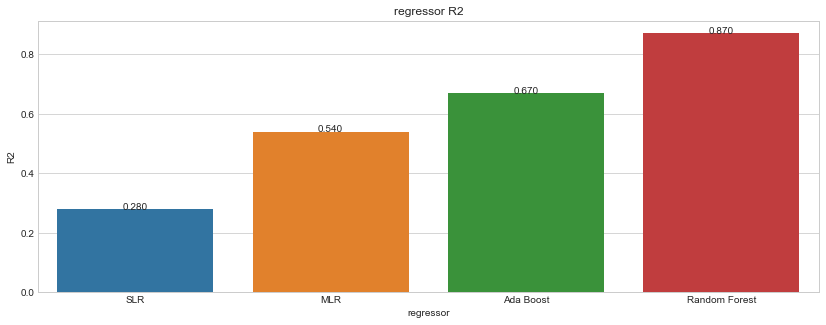

In [37]:
fig, ax = plt.subplots( figsize=(14,5) )
sns.barplot(x = reg['regressor'], y = reg['R2'])
plt.title('regressor's R2')

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) , 
            p.get_y() + p.get_height(), 
            f"{p.get_height():.3f}", 
            ha = 'center' ) 

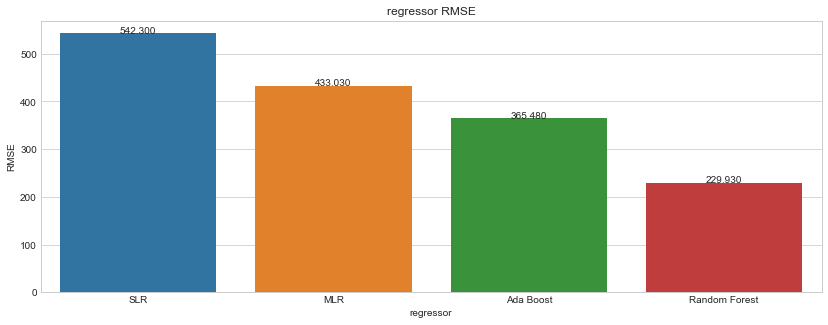

In [38]:
fig, ax = plt.subplots( figsize=(14,5) )
sns.barplot(x = reg['regressor'], y = reg['RMSE'])
plt.title('regressor RMSE')

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) , 
            p.get_y() + p.get_height(), 
            f"{p.get_height():.3f}", 
            ha = 'center' ) 